In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
songs = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/listening-counts.tsv',sep='\t',error_bad_lines=False)

<ipython-input-3-d9c5db5cb749>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  songs = pd.read_csv('/content/drive/MyDrive/집교 2_Team P/listening-counts.tsv',sep='\t',error_bad_lines=False)


In [4]:
songs.head()

,user_id,track_id,count
0,92915,26719936,1
1,92915,4271407,1
2,92915,4606511,1
3,92915,8966085,1
4,92915,12290897,1


In [ ]:
songs.shape

(519293333, 3)

In [ ]:
count = songs.groupby('track_id').count()
count.head()

,user_id,count
track_id,,
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [5]:
# 'track_id'를 기준으로 'count' 값을 더하고 정렬
sum_by_track = songs.groupby('track_id')['count'].sum().reset_index()
sorted_sum_by_track = sum_by_track.sort_values(by='count', ascending=False)

# 결과 출력
print(sorted_sum_by_track)

          track_id   count
36346257  36346257  284021
32496162  32496162  233427
33619193  33619193  223400
32083560  32083560  211291
45222862  45222862  211148
...            ...     ...
36359503  36359503       1
36359502  36359502       1
36359501  36359501       1
17286577  17286577       1
50813372  50813372       1

[50813373 rows x 2 columns]


In [10]:
count_1_tracks = sorted_sum_by_track[sorted_sum_by_track['count']<=5]
# count_2_tracks = sorted_sum_by_track[sorted_sum_by_track['count']==2]
# count_3_tracks = sorted_sum_by_track[sorted_sum_by_track['count']==3]
print("Count가 1인 트랙의 개수:", len(count_1_tracks))
# print("Count가 2인 트랙의 개수:", len(count_2_tracks))
# print("Count가 3인 트랙의 개수:", len(count_3_tracks))

Count가 1인 트랙의 개수: 34810207


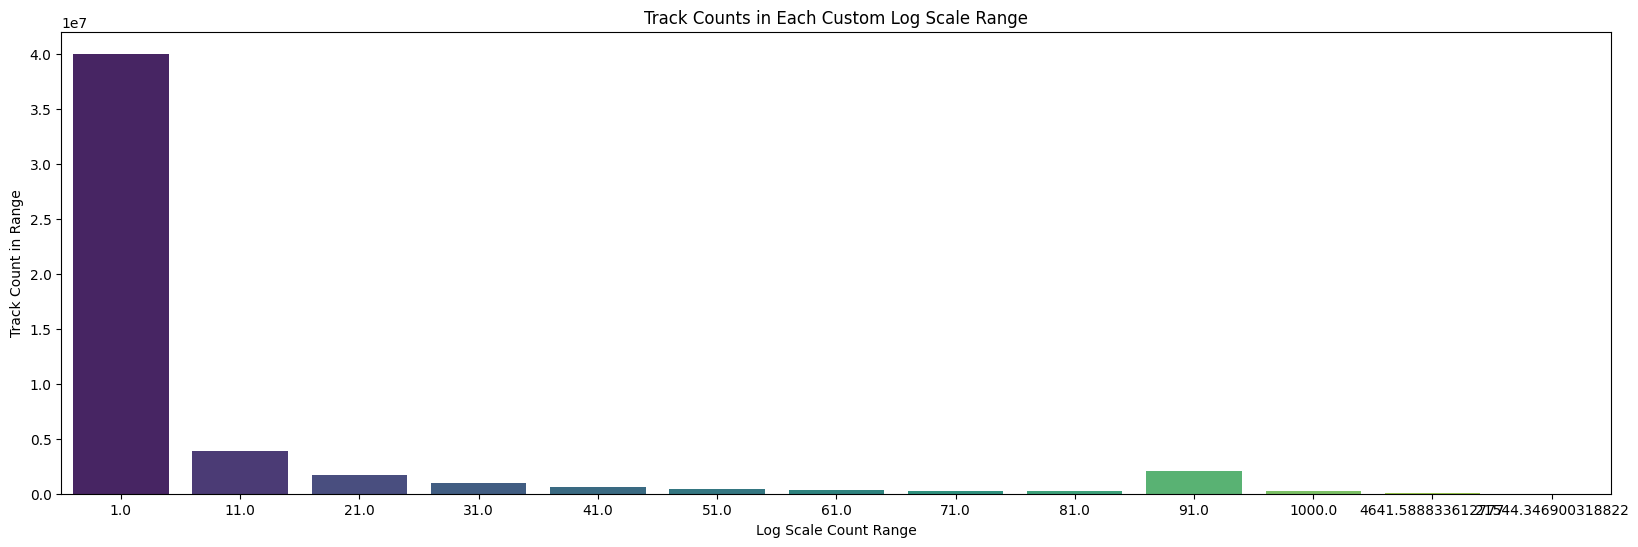

In [26]:
import numpy as np
# filtered_tracks = sorted_sum_by_track[sorted_sum_by_track['count'] > 5]
filtered_tracks = sorted_sum_by_track

# 로그 스케일로 범위를 지정하여 해당 범위 안에 속하는 트랙의 개수 카운트
count_ranges = np.concatenate([np.arange(1, 101, 10), np.logspace(3, 5, num=4, base=10)])
count_range_counts = []

for i in range(len(count_ranges) - 1):
    count_range_tracks = filtered_tracks[
        (filtered_tracks['count'] >= count_ranges[i]) & (filtered_tracks['count'] < count_ranges[i + 1])
    ]
    count_range_counts.append(len(count_range_tracks))

# 시각화
plt.figure(figsize=(20, 6))
sns.barplot(x=(count_ranges[:-1]), y=count_range_counts, palette="viridis")
plt.title('Track Counts in Each Custom Log Scale Range')
plt.xlabel('Log Scale Count Range')
plt.ylabel('Track Count in Range')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='track_id', data=sorted_sum_by_track)
plt.title('Top 10 Track Counts')
plt.xlabel('Count')
plt.ylabel('Track ID')
plt.show()